<a href="https://colab.research.google.com/github/theo171/it-cert-automation-practice/blob/master/testtraining%2C%20Nutriscans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! chmod 600 /content/kaggle.json
# mengunci akses kaggle 6 = 4 + 2, 0 0 untuk mengunci orang lain agar tidak masuk

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle  datasets download -d utkarshsaxenadn/fast-food-classification-dataset
# untuk memasukkan/ mendownload kaggle pake API Token

100% 818M/821M [00:09<00:00, 157MB/s]
100% 821M/821M [00:09<00:00, 90.4MB/s]


kaggle config view

In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/fast-food-classification-dataset.zip')
zip_file.extractall('/tmp/')
# pindah dan ekstrak zipfile dan masukkan ke temporary

In [ ]:
# mengimport data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# membuat training generator datanya menajdi nol hingga 1
train_generator = ImageDataGenerator(rescale= 1/255,
                                     horizontal_flip = True,
                                     vertical_flip= True,
                                     rotation_range=60,
                                     zoom_range=0.3,
                                     fill_mode='nearest')

In [ ]:
# membuat training data
train_data = train_generator.flow_from_directory('/tmp/Fast Food Classification V2/Train',
                             target_size=(224, 224), # di resize dan data asli tidak diubahmenuyeragamkan ukuran gambar
                             batch_size=105, # jumlah data yang akan di proses
                              class_mode='categorical', ) # class pada dataset

Found 15000 images belonging to 10 classes.


In [ ]:
# menyiapkan data validasi
val_generator = ImageDataGenerator(rescale= 1/255)

val_data = val_generator.flow_from_directory('/tmp/Fast Food Classification V2/Test',
                                             target_size=(224, 224), # di resize dan data asli tidak diubahmenuyeragamkan ukuran gambar
                                             class_mode='categorical',
                                             batch_size=30 # jumlah data yang akan di proses
                                            )

Found 1500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow_hub as hub

hub_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2"

feature_extractor = hub.KerasLayer(hub_url)

model = Sequential([
    feature_extractor,
    Dropout(.2),
    Dense(1024, 'relu'),
    Dense(10, 'softmax')
])


learning_rate = 0.001
sgd_optimizer = SGD(learning_rate=learning_rate)

In [ ]:
#Mengkompile modelnya
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
# Training Model
history  = model.fit(train_data,
                     steps_per_epoch=10,
                     epochs=10,
                     validation_data=val_data,
                     validation_steps=10,
                     verbose=2)

Epoch 1/10
10/10 - 249s - loss: 0.7559 - acc: 0.7724 - val_loss: 0.4725 - val_acc: 0.8833 - 249s/epoch - 25s/step
Epoch 2/10
10/10 - 278s - loss: 0.6768 - acc: 0.7924 - val_loss: 0.6210 - val_acc: 0.8400 - 278s/epoch - 28s/step
Epoch 3/10
10/10 - 279s - loss: 0.7045 - acc: 0.7714 - val_loss: 0.4389 - val_acc: 0.8667 - 279s/epoch - 28s/step
Epoch 4/10
10/10 - 244s - loss: 0.6450 - acc: 0.7914 - val_loss: 0.4638 - val_acc: 0.8900 - 244s/epoch - 24s/step
Epoch 5/10
10/10 - 281s - loss: 0.5788 - acc: 0.8076 - val_loss: 0.4722 - val_acc: 0.8633 - 281s/epoch - 28s/step
Epoch 6/10
10/10 - 281s - loss: 0.6268 - acc: 0.8181 - val_loss: 0.5623 - val_acc: 0.8433 - 281s/epoch - 28s/step
Epoch 7/10
10/10 - 280s - loss: 0.6269 - acc: 0.8010 - val_loss: 0.6488 - val_acc: 0.8467 - 280s/epoch - 28s/step
Epoch 8/10
10/10 - 278s - loss: 0.6279 - acc: 0.8114 - val_loss: 0.3978 - val_acc: 0.9033 - 278s/epoch - 28s/step
Epoch 9/10
10/10 - 278s - loss: 0.5960 - acc: 0.8143 - val_loss: 0.4408 - val_acc: 0.873

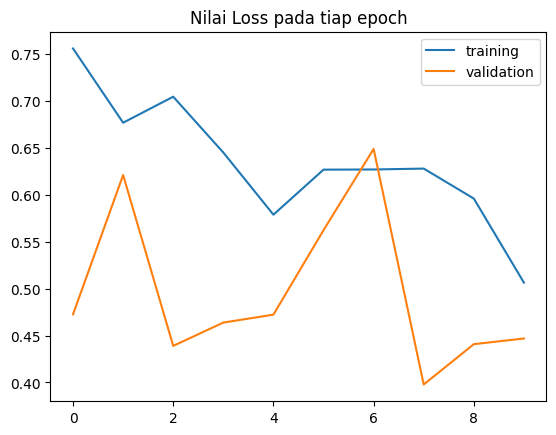

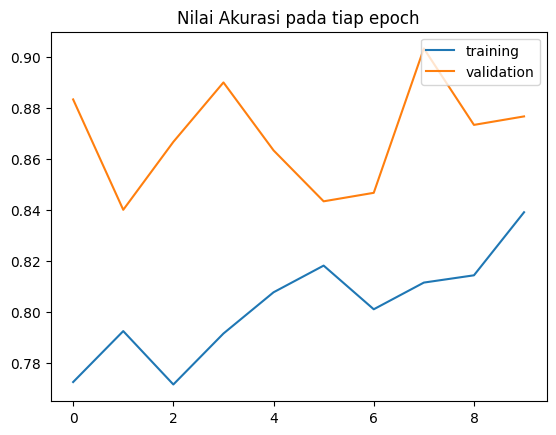

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss pada tiap epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Nilai Akurasi pada tiap epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
model.save("fast_food_classification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pip install tensorflow


In [ ]:
class_names = train_data.class_indices

print("Pemetaan Nama Kelas dan Indeks:", class_names)


Pemetaan Nama Kelas dan Indeks: {'Baked Potato': 0, 'Burger': 1, 'Crispy Chicken': 2, 'Donut': 3, 'Fries': 4, 'Hot Dog': 5, 'Pizza': 6, 'Sandwich': 7, 'Taco': 8, 'Taquito': 9}


In [ ]:
from tensorflow.keras.models import load_model

model_path = "/content/fast_food_classification.h5"

import tensorflow as tf
import tensorflow_hub as hub

with tf.keras.utils.custom_object_scope({'KerasLayer': hub.KerasLayer}):
    model = load_model(model_path)

image_path = "/content/Taquito.jpg"

img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array)


class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

print("Predicted class:", predicted_class)


1/1 [==============================] - 2s 2s/step
Predicted class: 2
